# Investigate a Dataset - Carvus Byrd

## Dataset

For this project I used the Lahman's Baseball Database (2014).

## Data Analysis Process

### Questions Posed

- Is there any truth to imaginary pay "jumps" around milestone (batting above .300 is considered a milestone) batting averages?  
    
    Batting Average Comparison 1 -> Player A = .310 vs Player B = .290
    
    Batting Average Comparison 2 -> Player C = .285 vs Player D = .265

    For example, will the difference in pay be greater when comparing Player A vs Player B or comparing Player C vs Player D?


- Does it matter if this analysis occurs in the National League (NL) or the American League (AL)?


- Can we identify other pay "jumps" for other batting statistics (i.e. On base percentage or Slugging percentage)?

### Data Wrangling

Import necessary modules and read data files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

batting = pd.read_csv('2014 Baseball Data/Batting.csv')
player_salary = pd.read_csv('2014 Baseball Data/Salaries.csv')

Populating the interactive namespace from numpy and matplotlib


C:\Users\03138\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Batting table needs to be condensed to account for players who play for multiple teams per season ('stint' column).  The 'groupby' function allows me to sum the remaining columns by player and year indexes.

In [2]:
batting_by_p_by_y = batting.groupby(['playerID','yearID'], as_index=False).sum()
batting_by_p_by_y.head(10)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2004,1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,aardsda01,2006,1,45,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,aardsda01,2007,1,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,aardsda01,2008,1,47,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,aardsda01,2009,1,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,aardsda01,2010,1,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,aardsda01,2012,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,aardsda01,2013,1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,aaronha01,1954,1,122,468,58,131,27,6,13,69,2,2,28,39,NaN,3,6,4,13
9,aaronha01,1955,1,153,602,105,189,37,9,27,106,3,1,49,61,5,3,7,4,20


I need to create a few standard baseball statistics to use in the comparison.  I'll create batting average, on base percentage, and slugging percentage.  I'm also adding these statistics to my grouped 'batting' dataframe.

In [3]:
batting_average = batting_by_p_by_y['H'] / batting_by_p_by_y['AB']
batting_by_p_by_y['BatAvg'] = batting_average

on_base_percent = (batting_by_p_by_y['H'] + batting_by_p_by_y['BB'] + \
                   batting_by_p_by_y['IBB'] + batting_by_p_by_y['HBP']) / \
                    (batting_by_p_by_y['AB'] + batting_by_p_by_y['BB'] + \
                     batting_by_p_by_y['IBB'] + batting_by_p_by_y['HBP'] + \
                     batting_by_p_by_y['SF'])
batting_by_p_by_y['OBP'] = on_base_percent

slg_percentage = (batting_by_p_by_y['H'] + batting_by_p_by_y['2B'] + \
                  batting_by_p_by_y['3B'] * 2 \
                  + batting_by_p_by_y['HR'] * 3) / batting_by_p_by_y['AB']
batting_by_p_by_y['SLG'] = slg_percentage

To begin answering my first question I need to create a function to identify the batting average groupings I want to compare.  This way I can compare batters who are right below and above the points of comparison (.300 and .275).  Using pandas dataframe, I can create my function, 'BattingAvgGrouping', and vectorize it within the 'apply' function.  The "value_counts" function allows me to see the counts of my groups created from the original function. 

In [4]:
def BattingAvgGrouping(BatAvg):
    if (BatAvg >= .290) & (BatAvg < .300):
        return 'Between .290 & .299'
    elif (BatAvg >= .300) & (BatAvg < .310):
        return 'Between .300 & .310'
    elif (BatAvg >= .265) & (BatAvg < .275):
        return 'Between .265 & .274'
    elif (BatAvg >= .275) & (BatAvg < .285):
        return 'Between .275 & .285'
    else:
        return 'Other'
    
BatAvgGrouping = batting_by_p_by_y['BatAvg'].apply(BattingAvgGrouping)
batting_by_p_by_y['BatAvgGrouping'] = BatAvgGrouping

batting_by_p_by_y['BatAvgGrouping'].value_counts()

Other                  78207
Between .265 & .274     4687
Between .275 & .285     4105
Between .290 & .299     2784
Between .300 & .310     2767
Name: BatAvgGrouping, dtype: int64

To help me merge my batting and salary tables, I need to create a concatanated index of 'playerID' and 'yearID'.  I used the 'apply(str)' to convert the column's data type from int64 to string (to help with concatanating).  I believe I could have done this without combining player and year IDs but this seemed easiest for me to figure out.

In [5]:
batting_by_p_by_y['yearID2'] = batting_by_p_by_y['yearID'].apply(str)
batting_by_p_by_y['player_year_ID'] = batting_by_p_by_y['playerID'] + \
                                        batting_by_p_by_y['yearID2']
batting_by_p_by_y.head(10)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,HBP,SH,SF,GIDP,BatAvg,OBP,SLG,BatAvgGrouping,yearID2,player_year_ID
0,aardsda01,2004,1,11,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,Other,2004,aardsda012004
1,aardsda01,2006,1,45,2,0,0,0,0,0,...,0,1,0,0,0.000000,0.000000,0.000000,Other,2006,aardsda012006
2,aardsda01,2007,1,25,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,Other,2007,aardsda012007
3,aardsda01,2008,1,47,1,0,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,Other,2008,aardsda012008
4,aardsda01,2009,1,73,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,Other,2009,aardsda012009
5,aardsda01,2010,1,53,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,Other,2010,aardsda012010
6,aardsda01,2012,1,1,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,Other,2012,aardsda012012
7,aardsda01,2013,1,43,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,Other,2013,aardsda012013
8,aaronha01,1954,1,122,468,58,131,27,6,13,...,3,6,4,13,0.279915,NaN,0.446581,Between .275 & .285,1954,aaronha011954
9,aaronha01,1955,1,153,602,105,189,37,9,27,...,3,7,4,20,0.313953,0.371041,0.539867,Other,1955,aaronha011955


Here I am doing the same thing with the salary table.  However, please note that I am also working to "shift" my years so that I am comparing this years batting statistics to next years salary.  I'm doing this because I want to understand the relationship of batting statistics on salary and salary, at least in MLB, is determined prior to the season so comparing batting and salary for the same year doesn't seem to make much since.  To do this, I created a new year column, made it one year less than the original, and then used the new year column as part of my concatanated index. 

In [6]:
player_salary['yearID2'] = player_salary['yearID'] - 1
player_salary['yearID2'] = player_salary['yearID2'].apply(str)
player_salary['player_year_ID'] = player_salary['playerID'] + player_salary['yearID2']
player_salary.head(10)

,yearID,teamID,lgID,playerID,salary,yearID2,player_year_ID
0,1985,ATL,NL,barkele01,870000,1984,barkele011984
1,1985,ATL,NL,bedrost01,550000,1984,bedrost011984
2,1985,ATL,NL,benedbr01,545000,1984,benedbr011984
3,1985,ATL,NL,campri01,633333,1984,campri011984
4,1985,ATL,NL,ceronri01,625000,1984,ceronri011984
5,1985,ATL,NL,chambch01,800000,1984,chambch011984
6,1985,ATL,NL,dedmoje01,150000,1984,dedmoje011984
7,1985,ATL,NL,forstte01,483333,1984,forstte011984
8,1985,ATL,NL,garbege01,772000,1984,garbege011984
9,1985,ATL,NL,harpete01,250000,1984,harpete011984


Once I have prepared my indexes, I can complete my merge.  I choose to make this an "inner" join to ensure I would always have salary information for my batting statistics.  I don't believe I need to worry about missing data as most of the missing data was prior to 1985 (the year the salary data starts).

In [7]:
batting_and_salary_data = batting_by_p_by_y.merge(player_salary, on = 'player_year_ID', \
                                                  how = 'inner')
batting_and_salary_data.head(10)

,playerID_x,yearID_x,stint,G,AB,R,H,2B,3B,HR,...,SLG,BatAvgGrouping,yearID2_x,player_year_ID,yearID_y,teamID,lgID,playerID_y,salary,yearID2_y
0,aardsda01,2006,1,45,2,0,0,0,0,0,...,0,Other,2006,aardsda012006,2007,CHA,AL,aardsda01,387500,2006
1,aardsda01,2007,1,25,0,0,0,0,0,0,...,NaN,Other,2007,aardsda012007,2008,BOS,AL,aardsda01,403250,2007
2,aardsda01,2008,1,47,1,0,0,0,0,0,...,0,Other,2008,aardsda012008,2009,SEA,AL,aardsda01,419000,2008
3,aardsda01,2009,1,73,0,0,0,0,0,0,...,NaN,Other,2009,aardsda012009,2010,SEA,AL,aardsda01,2750000,2009
4,aardsda01,2010,1,53,0,0,0,0,0,0,...,NaN,Other,2010,aardsda012010,2011,SEA,AL,aardsda01,4500000,2010
5,aasedo01,1985,1,54,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Other,1985,aasedo011985,1986,BAL,AL,aasedo01,600000,1985
6,aasedo01,1986,1,66,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Other,1986,aasedo011986,1987,BAL,AL,aasedo01,625000,1986
7,aasedo01,1987,1,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Other,1987,aasedo011987,1988,BAL,AL,aasedo01,675000,1987
8,aasedo01,1988,1,35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Other,1988,aasedo011988,1989,NYN,NL,aasedo01,400000,1988
9,abadfe01,2010,1,22,1,0,0,0,0,0,...,0,Other,2010,abadfe012010,2011,HOU,NL,abadfe01,418000,2010


Now that I have my combined dataframe, I begin making smaller filtered versions to help me use vectorized arithmetic later in the data exploration section.

In [8]:
Between_265_274 = batting_and_salary_data.loc[batting_and_salary_data.BatAvgGrouping == \
                    'Between .265 & .274',['playerID_x','yearID_x','G', \
                    'AB', 'H', 'BatAvg', 'BatAvgGrouping','lgID' ,'salary']]
Between_275_285 = batting_and_salary_data.loc[batting_and_salary_data.BatAvgGrouping == \
                    'Between .275 & .285',['playerID_x','yearID_x','G', \
                    'AB', 'H', 'BatAvg', 'BatAvgGrouping','lgID', 'salary']]
Between_290_299 = batting_and_salary_data.loc[batting_and_salary_data.BatAvgGrouping == \
                    'Between .290 & .299',['playerID_x','yearID_x','G', \
                    'AB', 'H', 'BatAvg', 'BatAvgGrouping','lgID', 'salary']]
Between_300_310 = batting_and_salary_data.loc[batting_and_salary_data.BatAvgGrouping == \
                    'Between .300 & .310',['playerID_x','yearID_x','G', \
                    'AB', 'H', 'BatAvg', 'BatAvgGrouping','lgID', 'salary']]

### Data Exploration

Let's check the average salary for each group.  We do see increases from lower group to higher group (which is good and what we expected).  The exploration seems the same amoung both leagues.

In [9]:
batting_and_salary_data.pivot_table('salary', index='BatAvgGrouping', aggfunc='mean')

BatAvgGrouping
Between .265 & .274    2413581
Between .275 & .285    2693164
Between .290 & .299    2989971
Between .300 & .310    3458331
Other                  1895563
Name: salary, dtype: int64

In [10]:
batting_and_salary_data.pivot_table('salary', index='BatAvgGrouping',\
                                    columns='lgID', aggfunc='mean')

lgID,AL,NL
BatAvgGrouping,,
Between .265 & .274,2591384,2268714
Between .275 & .285,2749213,2639140
Between .290 & .299,3257304,2744674
Between .300 & .310,3547923,3375435
Other,1909288,1882312


Let's also check to make sure we are working with a good amount of data before we get too far.  We find that we have a somewhat sizeable dataset for each group.  It also shows that fewer people are batting in the .290 to .310 range, which is definitely expected.  Again the exploration seems very similar in both leagues.

In [11]:
batting_and_salary_data.pivot_table('salary', index='BatAvgGrouping', aggfunc='count')

BatAvgGrouping
Between .265 & .274     1401
Between .275 & .285     1304
Between .290 & .299      884
Between .300 & .310      747
Other                  18228
Name: salary, dtype: int64

In [12]:
batting_and_salary_data.pivot_table('salary', index='BatAvgGrouping',\
                                    columns='lgID', aggfunc='count')

lgID,AL,NL
BatAvgGrouping,,
Between .265 & .274,629,772
Between .275 & .285,640,664
Between .290 & .299,423,461
Between .300 & .310,359,388
Other,8954,9274


This section shows the difference between the .275 to .285 batting average vs .265 to .274 batting average (67% increase).  We have these figures for all of MLB and both leagues(84% for AL and 70% for NL).   

In [13]:
MLB_275_difference = Between_275_285['salary'].mean() - Between_265_274['salary'].mean()
print MLB_275_difference

AL_275_difference = Between_275_285.loc[Between_275_285['lgID'] == 'AL','salary'].mean()\
        - Between_265_274.loc[Between_265_274['lgID'] == 'AL','salary'].mean()
print AL_275_difference

NL_275_difference = Between_275_285.loc[Between_275_285['lgID'] == 'NL','salary'].mean()\
        - Between_265_274.loc[Between_265_274['lgID'] == 'NL','salary'].mean()
print NL_275_difference

279582.276934
157829.1473
370426.386159


This section shows the difference between the .310 to .300 batting average vs .290 to .299 batting average.  We have these figures for all of MLB and both leagues.  It's clear that for all cases, this section has larger differences.   

In [14]:
MLB_300_difference = Between_300_310['salary'].mean() - Between_290_299['salary'].mean()
print MLB_300_difference

AL_300_difference = Between_300_310.loc[Between_300_310['lgID'] == 'AL','salary'].mean()\
        - Between_290_299.loc[Between_290_299['lgID'] == 'AL','salary'].mean()
print AL_300_difference

NL_300_difference = Between_300_310.loc[Between_300_310['lgID'] == 'NL','salary'].mean()\
        - Between_290_299.loc[Between_290_299['lgID'] == 'NL','salary'].mean()
print NL_300_difference

468359.507196
290618.484574
630760.711379


In [15]:
print (MLB_300_difference - MLB_275_difference) / MLB_275_difference
print (AL_300_difference - AL_275_difference) / AL_275_difference
print (NL_300_difference - NL_275_difference) / NL_275_difference

0.675211720615
0.84134863266
0.702796385323


The next 3 sections (Batting Average, On Base Percentage, and Slugging Percentage) walks through the process of trying to identify groupings of the respective batting statistics where average salary jumps the most from grouping to grouping.

#### Batting Average

The plot below compares Batting Average vs Salary.  It doesn't really tell us much but it's helpful to at least view it.  It was also clear that I needed to add a filter of only including players with more than 100 "at-bats" (The graph looked a bit wild).  I ran the "describe" function to find that the median was 94 so I went with 100.

In [16]:
batting_and_salary_data['AB'].describe()

count    20857.000000
mean       198.396078
std        212.281448
min          0.000000
25%          4.000000
50%         94.000000
75%        387.000000
max        716.000000
Name: AB, dtype: float64

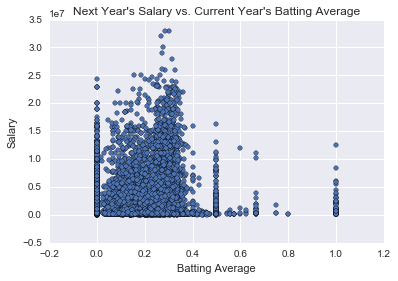

In [56]:
batting_and_salary_data.plot(kind='scatter', x='BatAvg', y='salary', \
                             title="Next Year's Salary vs. Current Year's Batting Average")

plt.xlabel('Batting Average')
plt.ylabel('Salary')

To better understand which groupings are most relevant for the analysis I've created a series that groups the batting averages in levels of .01 from .100 to .400.  After some research online, I found this neat combination of groupby, cut, and np.arrange to create such groups.  The graph shows we can probably just focus on .200 to .350 and capture a large portion of the data.

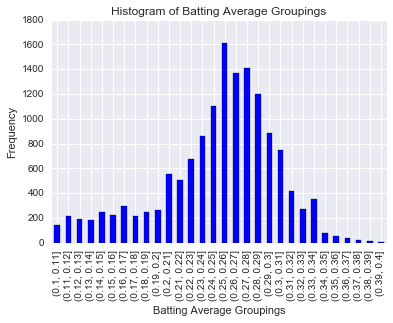

In [70]:
salary_by_batavg_count = batting_and_salary_data['salary'].\
    groupby(pd.cut(batting_and_salary_data['BatAvg'], np.arange(.1, .4, .01))).count()

salary_by_batavg_count.plot(kind='bar', title="Histogram of Batting Average Groupings")

plt.xlabel('Batting Average Groupings')
plt.ylabel('Frequency')

Using a similar method, only calculating mean instead of count, I've adjusted my ranges to only go from .200 to .350.  This graph is helpful but it doesn't clearly show us the "pay jumps".  We need to determine which jump (from group to group) is the largest.

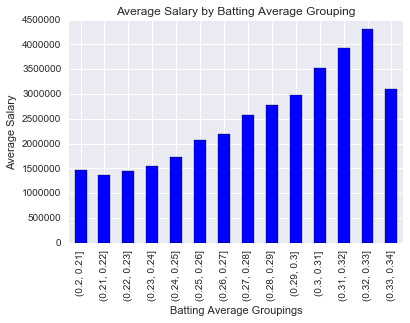

In [65]:
salary_by_batavg = batting_and_salary_data['salary'].\
    groupby(pd.cut(batting_and_salary_data['BatAvg'], np.arange(.2, .35, .01))).mean()

salary_by_batavg.plot(kind='bar', title='Average Salary by Batting Average Grouping')

plt.xlabel('Batting Average Groupings')
plt.ylabel('Average Salary')

This section takes the previous groupby series and creates a dataframe of the salary, shifted salary (previous year), and the difference between the two.  With the difference column, it's easy to identify that the .300 batting average mark has the largest pay jump.

In [20]:
salary_by_batavg_df = pd.concat([salary_by_batavg, salary_by_batavg.shift()], axis=1).dropna()
salary_by_batavg_df.columns.values[1] = 'py_salary'
salary_by_batavg_df['yty_diff'] = \
    salary_by_batavg_df['salary'] - salary_by_batavg_df['py_salary']
salary_by_batavg_df

,salary,py_salary,yty_diff
BatAvg,,,
"(0.21, 0.22]",1360557,1477578,-117021
"(0.22, 0.23]",1449251,1360557,88694
"(0.23, 0.24]",1555447,1449251,106196
"(0.24, 0.25]",1732534,1555447,177087
"(0.25, 0.26]",2067096,1732534,334562
"(0.26, 0.27]",2201270,2067096,134174
"(0.27, 0.28]",2585344,2201270,384074
"(0.28, 0.29]",2776782,2585344,191438
"(0.29, 0.3]",2971916,2776782,195134


The remaining two sections follow the same methods.  I'll discuss some of the differences in results in the conclusion section but the methods were the exact same.

#### On Base Percentage

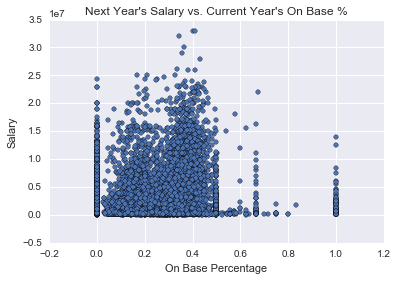

In [55]:
batting_and_salary_data.plot(kind='scatter', x='OBP', y='salary', \
                             title="Next Year's Salary vs. Current Year's On Base %")

plt.xlabel('On Base Percentage')
plt.ylabel('Salary')

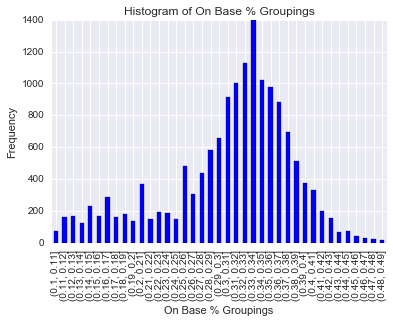

In [69]:
salary_by_obp_count = batting_and_salary_data['salary'].groupby(\
                      pd.cut(batting_and_salary_data['OBP'], np.arange(.1, .5, .01))).count()
salary_by_obp_count.plot(kind='bar', title="Histogram of On Base % Groupings")

plt.xlabel('On Base % Groupings')
plt.ylabel('Frequency')

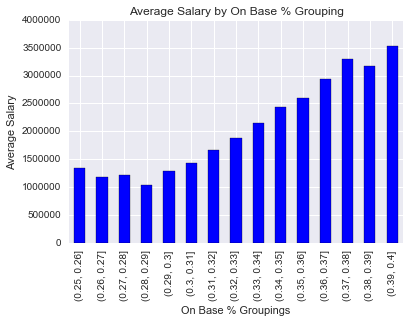

In [63]:
salary_by_obp = batting_and_salary_data['salary'].groupby(\
                pd.cut(batting_and_salary_data['OBP'], np.arange(.25, .4, .01))).mean()
salary_by_obp.plot(kind='bar', title='Average Salary by On Base % Grouping')

plt.xlabel('On Base % Groupings')
plt.ylabel('Average Salary')

In [24]:
salary_by_obp_df = pd.concat([salary_by_obp, salary_by_obp.shift()], axis=1).dropna()
salary_by_obp_df.columns.values[1] = 'py_salary'
salary_by_obp_df['yty_diff'] = salary_by_obp_df['salary'] - salary_by_obp_df['py_salary']
salary_by_obp_df

,salary,py_salary,yty_diff
OBP,,,
"(0.26, 0.27]",1187274,1348683,-161409
"(0.27, 0.28]",1217368,1187274,30094
"(0.28, 0.29]",1033878,1217368,-183490
"(0.29, 0.3]",1295831,1033878,261953
"(0.3, 0.31]",1427915,1295831,132084
"(0.31, 0.32]",1667503,1427915,239588
"(0.32, 0.33]",1876930,1667503,209427
"(0.33, 0.34]",2143106,1876930,266176
"(0.34, 0.35]",2427426,2143106,284320


#### Slugging Percentage

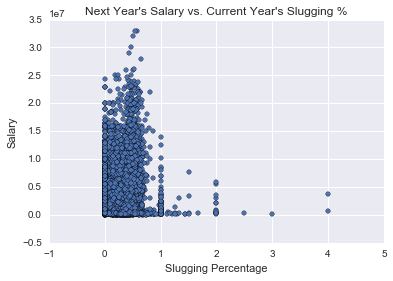

In [57]:
batting_and_salary_data.plot(kind='scatter', x='SLG', y='salary', \
                             title="Next Year's Salary vs. Current Year's Slugging %")

plt.xlabel('Slugging Percentage')
plt.ylabel('Salary')

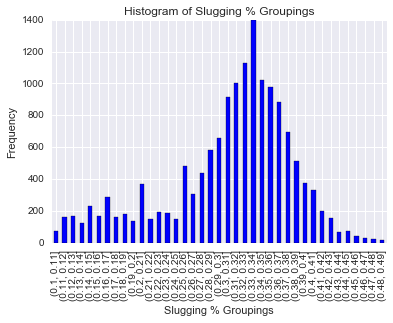

In [67]:
salary_by_slg_count = batting_and_salary_data['salary'].groupby(\
                      pd.cut(batting_and_salary_data['SLG'], np.arange(.1, .7, .01))).count()
salary_by_obp_count.plot(kind='bar', title="Histogram of Slugging % Groupings")

plt.xlabel('Slugging % Groupings')
plt.ylabel('Frequency')

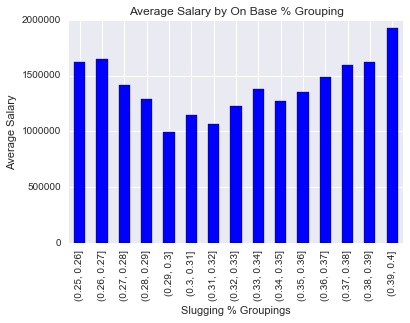

In [68]:
salary_by_slg = batting_and_salary_data['salary'].groupby(\
                pd.cut(batting_and_salary_data['SLG'], np.arange(.25, .4, .01))).mean()
salary_by_slg.plot(kind='bar', title='Average Salary by On Base % Grouping')

plt.xlabel('Slugging % Groupings')
plt.ylabel('Average Salary')

In [28]:
salary_by_slg_df = pd.concat([salary_by_slg, salary_by_slg.shift()], axis=1).dropna()
salary_by_slg_df.columns.values[1] = 'py_salary'
salary_by_slg_df['yty_diff'] = salary_by_slg_df['salary'] - salary_by_slg_df['py_salary']
salary_by_slg_df

,salary,py_salary,yty_diff
SLG,,,
"(0.26, 0.27]",1651641,1623824,27817
"(0.27, 0.28]",1417715,1651641,-233926
"(0.28, 0.29]",1287956,1417715,-129759
"(0.29, 0.3]",993314,1287956,-294642
"(0.3, 0.31]",1145995,993314,152681
"(0.31, 0.32]",1067020,1145995,-78975
"(0.32, 0.33]",1228462,1067020,161442
"(0.33, 0.34]",1379201,1228462,150739
"(0.34, 0.35]",1273805,1379201,-105396


### Drawing Conclusions

- Is there any truth to imaginary pay "jumps" around milestone (batting above .300 is considered a milestone) batting averages?  
    
    Batting Average Comparison 1 -> Player A = .310 vs Player B = .290
    
    Batting Average Comparison 2 -> Player C = .285 vs Player D = .265

    For example, will the difference in pay be greater when comparing Player A vs Player B or comparing Player C vs Player D?
    
    I think we can say there is a larger jump (67% increase) in going from right below .300 to right above .300 as compared to our other comparison around .275.  Although there is not any statistical testing, I think it tells a neat story that there is a stigma of being over or under batting .300.


- Does it matter if this analysis occurs in the National League (NL) or the American League (AL)?

    It is clear that the AL and NL have similar increases at 84% and 70%, respectively.


- Can we identify other pay "jumps" for other batting statistics (i.e. On base percentage or Slugging percentage)?

    I ran an analysis for batting average, on base percentage, and slugging percentage.  My goal was to group each statistic into adjacent groups and find the differences from group to group (i.e. 280s vs 290s).  Then I can isolate the larger differences and call these intances my "pay jumps".
    The batting average example is the easiest as there is a pay jump right at the .300 mark.  It's consistent with earlier research and other baseball common knowledge.
    The on base percentage and slugging percentage examples are not as clear.  I'm not 100% sure why I'm having negative changes in salary given higher level of performances for these two statistics.  I have a guess that some of the older data (pre 2000) will be pre "Moneyball" era and teams may not have been as good at using those statistics to pick out good players.
    Either way, we can still pick out that there seems to be OBP & SLG pay jumps in the mid to upper .300s.